# Churn Modelling using ANN

In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.1


In [3]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Divide the dataset into independent and dependent dataset
X = dataset.iloc[:,3:13] # Skip the first 3 cloumns as they are not relavent features (RowNumber, CustomerId, Surname)
y = dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


## Feature Engineering
Handle categorical features

In [7]:
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender=pd.get_dummies(X['Gender'], drop_first=True)

In [8]:
# Concatinate these variables with dataframe and drop the existing categorical features from dataset
X = X.drop(['Gender', 'Geography'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [9]:
X = pd.concat([X, geography, gender], axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
# Split dataset into train test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature scaling
fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

Also to avoid data leakage we dont use fit_transform on test data. Data leakage is one of the major problems in machine learning which occurs when the data that we are using to train an ML algorithm has the information the model is trying to predict. It is a situation that causes unpredictable and bad prediction outcomes after model deployment.

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
X_train.shape

(8000, 11)

## Create ANN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [61]:
## Initialize ANN
classifier = Sequential()

In [62]:
## Add input layer
classifier.add(Dense(units=11, activation='relu')) # Here units are the number of input features we pass to the ANN

In [63]:
## Adding the first Hidden Layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [64]:
## Adding the second Hidden Layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3 ))

In [65]:
## Adding the Output Layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [66]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
## We can also change the learning rate as folows
## import tensorflow
## opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
## And use it in in the classifier as:
## classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
## Early stopping
import tensorflow as ts
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [69]:
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.5873 - accuracy: 0.7236 - val_loss: 0.4836 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4817 - accuracy: 0.7977 - val_loss: 0.4374 - val_accuracy: 0.7952
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4545 - accuracy: 0.8074 - val_loss: 0.4237 - val_accuracy: 0.8020
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4426 - accuracy: 0.8117 - val_loss: 0.4186 - val_accuracy: 0.8111
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.8121 - val_loss: 0.4125 - val_accuracy: 0.8148
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.8184 - val_loss: 0.4073 - val_accuracy: 0.8213
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8209 - val_loss: 0.3965 - val_accuracy:

In [70]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

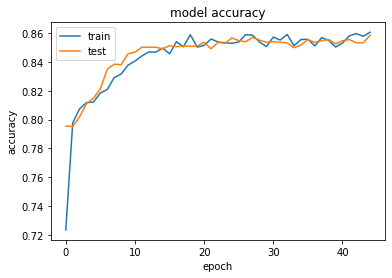

In [71]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

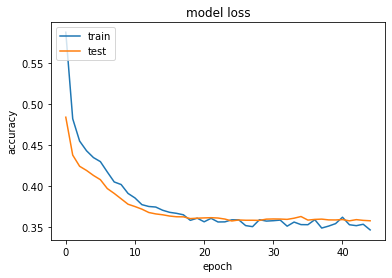

In [72]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
## Prediction and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [74]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [75]:
cm

array([[1532,   63],
       [ 216,  189]], dtype=int64)

In [76]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [77]:
score

0.8605

In [78]:
## Get the weights
classifier.get_weights()

[array([[-1.88391022e-02,  1.37144960e-02, -8.94681960e-02,
          3.21191028e-02,  2.34255977e-02,  4.13410753e-01,
          2.95145899e-01, -2.78176308e-01, -6.87913820e-02,
          7.57634640e-02, -4.77052145e-02],
        [ 6.82698548e-01, -6.41137660e-02, -7.58840024e-01,
          1.94767654e-01, -2.81261116e-01, -4.68916774e-01,
          9.83440578e-02,  2.29263864e-02,  6.22292161e-01,
         -6.42634213e-01,  3.64982188e-01],
        [ 2.13137284e-01,  5.25843799e-01,  8.82346034e-02,
         -3.88054363e-02,  8.60929340e-02, -3.02299857e-01,
         -1.49015784e-02, -1.80099115e-01,  1.39136771e-02,
          1.30914107e-01, -7.47951632e-03],
        [-2.40800172e-01, -4.73177731e-01,  3.39609772e-01,
          6.11284912e-01, -2.03595817e-01, -3.36675286e-01,
         -4.47880179e-01,  2.87245512e-01,  4.46355581e-01,
          7.15581924e-02, -2.55231708e-01],
        [ 1.63485050e-01,  5.65639257e-01, -1.28844038e-01,
          1.12625456e+00, -1.34272039e-01,  